# M Coloring Problem Graph

Pewarnaan simpul: {0: 1, 1: 2, 2: 3, 3: 1, 5: 2, 4: 3, 6: 1, 7: 2, 8: 1, 9: 2}


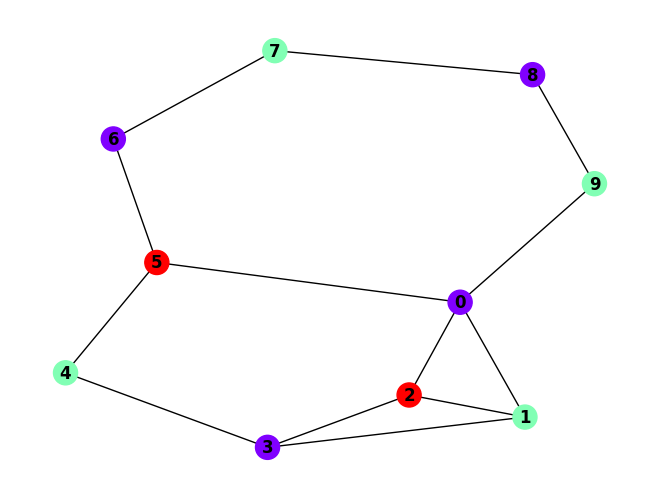

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def m_coloring(graph, m):
    colors = {}  # Simpan pewarnaan setiap simpul di sini

    # Fungsi untuk memeriksa apakah pewarnaan simpul i aman dengan warna c
    def is_safe(node, c):
        for neighbor in graph[node]:
            if neighbor in colors and colors[neighbor] == c:
                return False
        return True

    # Fungsi untuk memilih warna untuk simpul
    def choose_color(node):
        for c in range(1, m + 1):
            if is_safe(node, c):
                return c

    # Heuristik: Pilih simpul dengan derajat tertinggi terlebih dahulu
    sorted_nodes = sorted(graph.degree, key=lambda x: x[1], reverse=True)

    # Mewarnai simpul satu per satu
    for node, _ in sorted_nodes:
        colors[node] = choose_color(node)

    return colors

def visualize(graph, colors):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=list(colors.values()), cmap=plt.cm.rainbow)
    plt.show()

# Buat graf dengan 10 simpul dan sambungan yang lebih kompleks
G = nx.Graph()
nodes = list(range(10))
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 0), (0, 5)]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Jumlah warna yang digunakan
m_value = 4

# Pewarnaan simpul
coloring_result = m_coloring(G, m_value)
print("Pewarnaan simpul:", coloring_result)

# Visualisasi graf dengan pewarnaan
visualize(G, coloring_result)
